1. Let's clear the text from stop words

In [44]:
from pathlib import Path
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio.v2 as imageio

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#! touch "/content/gdrive/My Drive/Propp/Proppfunc.txt"

In [46]:
file_path =  '/content/gdrive/My Drive/Propp/Proppfunc.txt'

In [47]:
#reading on the strings
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [48]:
#split paragraphs
paragraphs = text.split('\n\n')

In [25]:
#list of func Count
all_functions = []
for paragraph in paragraphs:
    #split each paragraph on functions on commas and adding to the general list
    functions = [func.strip().replace('\n', '') for func in paragraph.split(', ')]
    all_functions.extend(functions)

In [26]:
#counting the frequency of the function
function_counts = Counter(all_functions)
top10 = function_counts.most_common(10)

In [49]:
#join each paragraph
documents = [' '.join([func.strip() for func in paragraph.split(', ') if func.strip()]) for paragraph in paragraphs]


In [50]:
#use TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

In [51]:
#TF-IDF weights for each word
tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray().sum(axis=0)))


3. Creating a dataframe of stop 10 functions in the text

In [64]:
#creating new df
df = pd.DataFrame(top10, columns=['word', 'count'])
df

,word,count
0,villainy,19
1,victory,18
2,first_donor_function,17
3,receipt_of_agent,17
4,trickery,16
5,departure,16
6,difficult_task,16
7,violation,15
8,counteraction,15
9,guidance,15


In [52]:
#top10_tf-idf
top10_tfidf = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:10]

In [53]:
#creating new df for tf-idf
df_tfidf = pd.DataFrame(top10_tfidf, columns=['function', 'tfidf_score'])

In [63]:
df_tfidf

,function,tfidf_score
0,villainy,0.243550
1,victory,0.230731
2,departure,0.217913
3,first_donor_function,0.217913
4,receipt_of_agent,0.217913
5,difficult_task,0.205094
6,guidance,0.205094
7,struggle,0.205094
8,trickery,0.205094
9,violation,0.205094


4. Creating a histogram (listing)

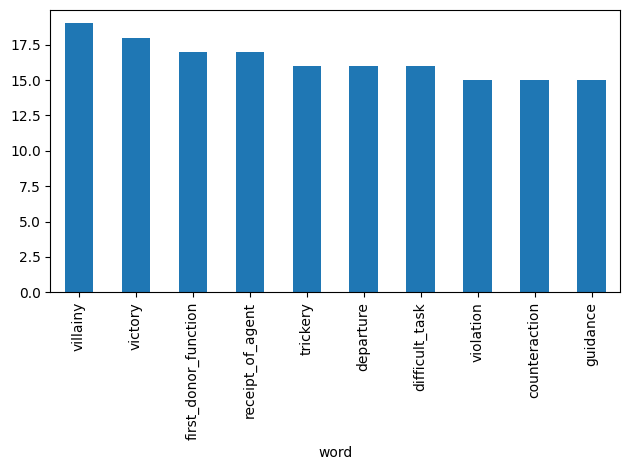

In [ ]:
#creating hist
%matplotlib inline
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

<Figure size 1000x600 with 0 Axes>

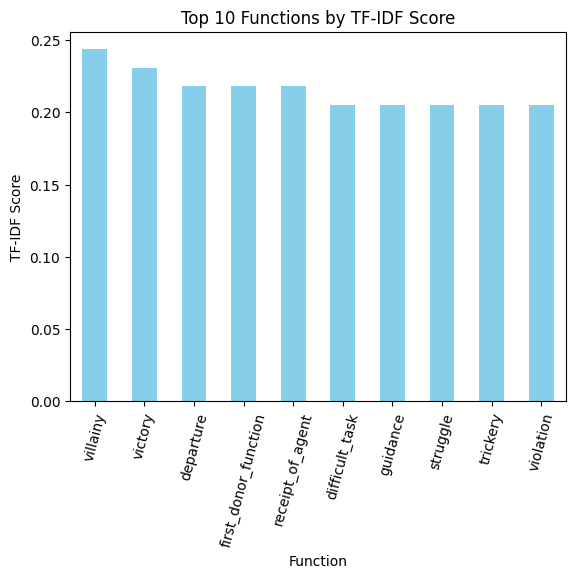

In [60]:
plt.figure(figsize=(10, 6))
df_tfidf.plot(kind='bar', x='function', y='tfidf_score', legend=False, color='skyblue')
plt.title("Top 10 Functions by TF-IDF Score")
plt.xlabel("Function")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=75)
plt.show()

In [33]:
#creating mask
mask_image = imageio.imread('/content/gdrive/My Drive/Propp/mask.jpeg')
wordcloud = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, max_words=100, background_color='white')
#wordcloud = wordcloud.generate_from_frequencies(function_counts)

wordcloud = wordcloud.generate_from_frequencies(tfidf_scores)

In [62]:
#save and display
#wordcloud.to_file('/content/gdrive/My Drive/Propp/mask_3.jpeg')

5. Creating a Word cloud (listing)

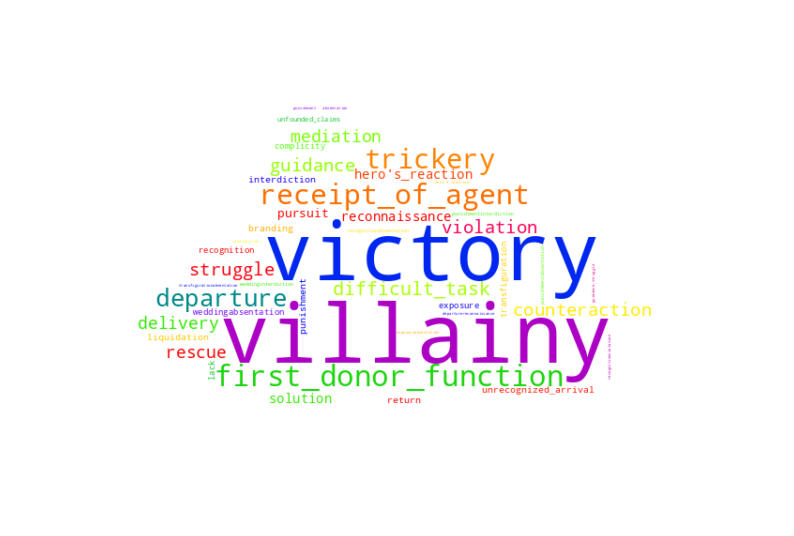

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

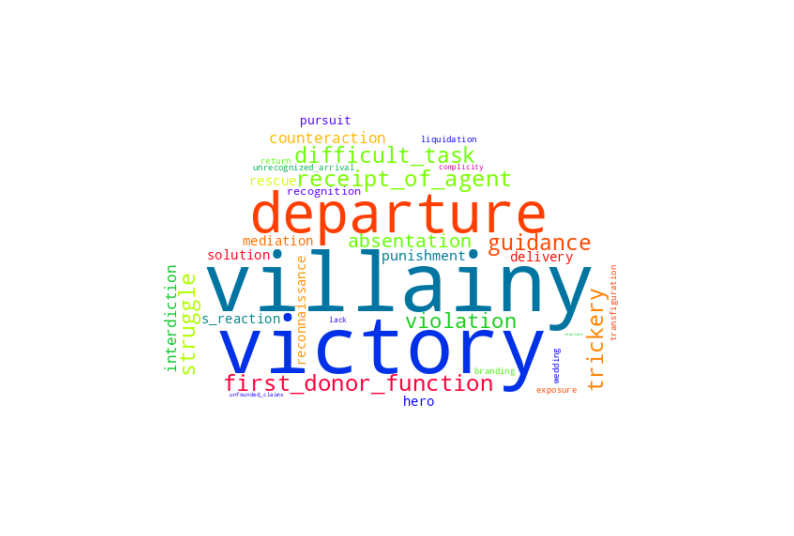

In [61]:
#wordcloud with tf-idf
wordcloud.to_file('/content/gdrive/My Drive/Propp/mask_tfidf.jpeg')
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()